### **LogisticRegression** is for predicting discrete value
- TWO categories:
  - leave or stay (job)
  - survive or perish (Titanic)
- THREE categories:
  - cheap, reasonable, expensive (house or car)
  - mammal, bird, reptile (animal)

### **LinearRegression** is for predicting continuous values (price)
build a model to predict if an employee will leave the company


In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image
import pprint as pp
import seaborn as sns

In [32]:
# more matplot sub-modules for displaying image inside chart
import matplotlib.image as mpimg
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

# StandardScaler sets all mean values in a col to 0 and uses std for other values
from sklearn.preprocessing import StandardScaler

# LabelEncoder converts categorical string values to numbers: Chocolate, Vanilla, Strawberry become 0,1,2
from sklearn.preprocessing import LabelEncoder

# confusion matric for plotting all possible answers: TP, TN, FP, FN

# import model for predicting discreet categories
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [33]:
# from google.colab import drive
# drive.mount('/content/drive')

**LabelEncoder converts string values to numbers**
- machine learning models require numeric values
- convert string to numeric data using LabelEncoder
- ex: Chocolate, Vanilla, Strawberry becomes 0,1,2

In [34]:
# label encoder intro: make a new, empty Data Frame, ice_cream_df
ice_cream_df = pd.DataFrame()

In [35]:
# make a "Flavor" column and assign it these values:
flavors_column = ["Chocolate", "Vanilla", "Strawberry", "Vanilla", "Vanilla", "Chocolate", "Vanilla", "Strawberry","Chocolate"]
print(len(flavors_column))

9


In [36]:
# declare a "Flavor" column and assign it the list:
ice_cream_df["Flavor"] = flavors_column

In [37]:
print(ice_cream_df.shape) # (9, 1)
ice_cream_df

(9, 1)


,Flavor
0,Chocolate
1,Vanilla
2,Strawberry
3,Vanilla
4,Vanilla
5,Chocolate
6,Vanilla
7,Strawberry
8,Chocolate


In [38]:
# label encoding involves converting string values to numeric values
# the numeric values are called "categorical values"
# initialize LabelEncoder
label_enc = LabelEncoder()
# label encoder will swap numbers for strings, in
# Chocolate == 0
# Strawberry == 1
# Vanilla == 2
# the numbers are assigned in alphabetical order
# the reason for converting strings to categorical values --
# numbers instead of strings -- is for categorical predictions

In [39]:
# declare a new column, which will be the numeric version of Flavor
ice_cream_df["Flavor Num"] = label_enc.fit_transform(ice_cream_df["Flavor"])

In [40]:
print(ice_cream_df.shape) # (9, 2)
ice_cream_df

(9, 2)


,Flavor,Flavor Num
0,Chocolate,0
1,Vanilla,2
2,Strawberry,1
3,Vanilla,2
4,Vanilla,2
5,Chocolate,0
6,Vanilla,2
7,Strawberry,1
8,Chocolate,0


- **One Hot Encoding**
- for One Hot Encoding of categorical data, all categories get their own column
- so each flavor would have a column
- a 'chocolate row' would have a value of 1 in the 'chocolate' column
and a value of 0 in the 'strawberry' and 'vanilla' columns
- **pd.get_dummies(df['col_name'])** returns a new df where all  values in the the col argument are columns

In [41]:
# get_dummies makes columns for each category
# "actual value" -- the "hot one" is assigned a value of 1 and the others -- the blank "dummies" are 0
one_hot_enc_flav_df = pd.get_dummies(ice_cream_df['Flavor'],dtype=int)

In [42]:
print(one_hot_enc_flav_df.shape) # (9,3)
one_hot_enc_flav_df

(9, 3)


,Chocolate,Strawberry,Vanilla
0,1,0,0
1,0,0,1
2,0,1,0
3,0,0,1
4,0,0,1
5,1,0,0
6,0,0,1
7,0,1,0
8,1,0,0


- **df3 = pd.concat([df1,df2])** returns df1 combined w df2

In [43]:
# concatenate the original df w the dummies df
# axis=0 refers to row (horiz axis), so it adds new rows (which we do not want)
# axis=1 refers to column (vertical axis), so it adds new cols (which we DO want)
ice_cream_df = pd.concat([ice_cream_df,one_hot_enc_flav_df],axis=1)

In [44]:
print(ice_cream_df.shape) # (9, 5)
ice_cream_df

(9, 5)


,Flavor,Flavor Num,Chocolate,Strawberry,Vanilla
0,Chocolate,0,1,0,0
1,Vanilla,2,0,0,1
2,Strawberry,1,0,1,0
3,Vanilla,2,0,0,1
4,Vanilla,2,0,0,1
5,Chocolate,0,1,0,0
6,Vanilla,2,0,0,1
7,Strawberry,1,0,1,0
8,Chocolate,0,1,0,0


In [73]:
hr_df = pd.read_csv("../csv/HR_analytics.csv")
print(hr_df.shape) # (14999, 10)
hr_df.head()

(14999, 10)


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [76]:
# cols_list = list(hr_df.columns)
cols_list = hr_df.columns.tolist()
pp.pprint(cols_list)

['satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'left',
 'promotion_last_5years',
 'department',
 'salary']


In [78]:
# get the unique values from the 'department' column:
# df['col'].unique().tolist()
depts_list = hr_df['department'].unique().tolist()
pp.pprint(depts_list)

['sales',
 'accounting',
 'hr',
 'technical',
 'support',
 'management',
 'IT',
 'product_mng',
 'marketing',
 'RandD']


In [79]:
# get the different values of the 'left' column:
left_list = hr_df['left'].unique().tolist()
print(left_list)
# there are only 2 possible values for 'left' col: 1 (left), 0 (stayed)

[1, 0]


In [80]:
#check for null values
hr_df.info() # there are no missing values, despite the huge number of rows
# hr_

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [81]:
# df.value_counts()
# returns the total number of values in each category
# ex: how many 1 and 0 values in 'left' column
# df.value_counts() method returns itemized counts by values
# in case of 'left' col, this is only 0 and 1 value counts
left_vs_stayed = hr_df.value_counts('left')
print(type(left_vs_stayed)) # <class 'pandas.core.series.Series'>
print(left_vs_stayed)
# left
# 0    11428
# 1     3571

<class 'pandas.core.series.Series'>
left
0    11428
1     3571
dtype: int64


In [82]:
# value counts by dept:
value_counts_by_dept = hr_df.value_counts('department')
print(value_counts_by_dept)

department
sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
dtype: int64


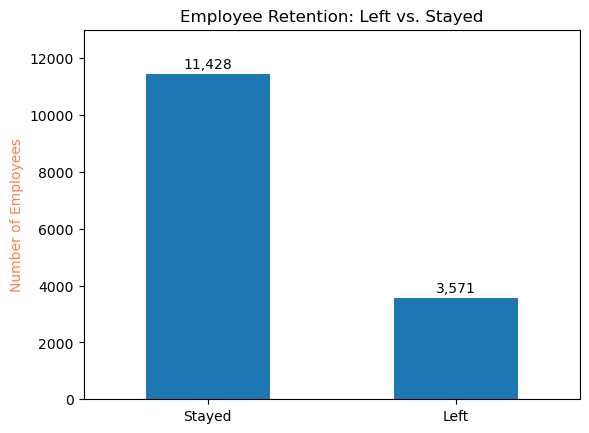

In [ ]:
# make a bar chart comparing left vs stayed
# do it directly off on the left vs stayed series (no plt or sns needed)
# label the bars: 
# a.) set plot itself equal to a variable
left_vs_stayed.plot(kind='bar')
# stand xticks (0,1) upright
plt.xticks(rotation=0)
# change xlabel from 'left' to something more informative
plt.xlabel('') # or better: just turn off xlabel (no 'left')
# add a title up top:
plt.title("Employee Retention: Left vs. Stayed")
# label the y-axis
plt.ylabel("Number of Employees",color='coral')
# increase the y-limit to make room for bar value labels
plt.ylim(0,13000)
# b.) label the two bars with their numeric values
plt.text(0,left_vs_stayed[0]+200,
         f"{left_vs_stayed[0]:,.0f}", # add comma to num
         ha='center')
plt.text(1,left_vs_stayed[1]+200,
         f"{left_vs_stayed[1]:,.0f}", # add comma to num
         ha='center')
# 'Stayed' and 'Left' # for replacing [0,1] the actual column values
# replace 0,1 xtick labels with user-friendly Stayed/Left
plt.xticks([0,1],['Stayed','Left'])
plt.show()

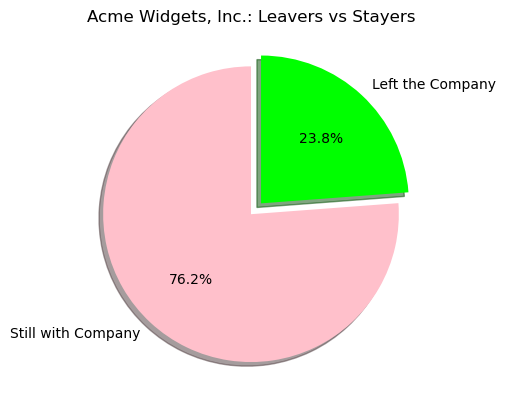

In [119]:
# make a pie chart showing pct of employees who left company vs. who stayed
plt.pie(left_vs_stayed,
    labels=['Still with Company', 'Left the Company'],
    startangle=90,
    colors=['pink','lime'],
    autopct='%1.1f%%',
    explode=[0,0.1],
    shadow=True
)

plt.title('Acme Widgets, Inc.: Leavers vs Stayers')
# save pie chart as img file
plt.savefig('../images/pie-chart-leavers-vs-stayers.png')
plt.show()

**crosstab: cross-tabulation of two or more factors**

- salary (string value) any impact of salary on employee retention
- **pd.crosstab(col1,col2)** computes a frequency table of two or  
more variables, which summarizes the distribution of values in the  
data and provides insights into the relationships between the variables.
- A frequency table is a table that shows the distribution of values in a dataset by
counting the number of occurrences of each value. For example, suppose we have a
- dataset of students that contains information about their gender and education level.
- A frequency table of gender and education level would summarize the number of male
and female students in each education level category.
- Pandas crosstab() function provides a simple and flexible way to compute
frequency tables of two or more variables.

In [120]:
# make a cross tab df that compares salary vs department
# the result will show the counts for each salary category by dept
sal_by_dept_df = pd.crosstab(hr_df['salary'],hr_df['department'])

In [121]:
print(sal_by_dept_df.shape) # (3, 10)
sal_by_dept_df

(3, 10)


department,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
salary,,,,,,,,,,
high,83,51,74,45,225,80,68,269,141,201
low,609,364,358,335,180,402,451,2099,1146,1372
medium,535,372,335,359,225,376,383,1772,942,1147


In [122]:
# make a cross tab DF that gives the count of leavers/stayers by dept
left_vs_stayed_by_dept_df = pd.crosstab(hr_df['left'],hr_df['department'])

In [123]:
print(left_vs_stayed_by_dept_df.shape) # (2, 10)
left_vs_stayed_by_dept_df

(2, 10)


department,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
left,,,,,,,,,,
0,954,666,563,524,539,655,704,3126,1674,2023
1,273,121,204,215,91,203,198,1014,555,697


- **rename index (row names)**
  - **df.index = ['row1', 'row2']**
- **rename columns**
  - **df.columns = ['col1', 'col2']**
  - **df.rename(columns={'old_col_name':'new_col_name'})**

In [124]:
left_vs_stayed_by_dept_df.index = ['Stayed','Left']

In [126]:
print(left_vs_stayed_by_dept_df.shape) # (2, 10)
left_vs_stayed_by_dept_df

(2, 10)


department,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
Stayed,954,666,563,524,539,655,704,3126,1674,2023
Left,273,121,204,215,91,203,198,1014,555,697


In [57]:
# pd.crosstab(index, columns, values=None, rownames=None, colnames=None, aggfunc=None, margins=False, margins_name='All', dropna=True, normalize=False)

### **Late PM Lab Challenge**

In [ ]:
# Let's start with a example to create a
# crosstab table of two variables: gender and
# education level. We'll use a dataset of students
# that contains information about their gender,
# education level, and test scores.

# 'male', 'male', 'female', 'female', 'male', 'female', 'male', 'female'

# 'HS grad', 'some college', 'some college', 'college grad', 'HS grad', 'college grad', 'some college', 'college grad'

# 75, 82, 88, 95, 69, 92, 78, 85

In [59]:
# challenge make a df called students_df that has 3 cols: Gender, Parental Edu and Avg Score; resulting shape should be (8,3) -- 8 rows of 3 cols each
# stu

In [60]:
print() # (8, 3)
# st

In [61]:
# now for the crosstab of gender vs parental edu
# Parental Edu

In [62]:
print() # (2, 3)
# gen

In [63]:
# CHALLENGE: given this dictionary, make a df called students2_df
# HINT: do not declare a new EMPTY df -- pass in the dict
#.      the col names will AUTOMATICALLY be generated from the keys
student_data = {
    'Gender': [
        'male', 'female', 'female', 'male', 'female',
        'male', 'male', 'female', 'female', 'male',
        'female', 'male', 'female', 'male', 'female',
        'male', 'female', 'female', 'male', 'male'
    ],
    'Parental_Edu': [
        'HS grad', 'some college', 'college grad', 'Masters Degree', 'PhD',
        'some college', 'college grad', 'Masters Degree', 'HS grad', 'PhD',
        'college grad', 'HS grad', 'Masters Degree', 'PhD', 'some college',
        'college grad', 'HS grad', 'PhD', 'Masters Degree', 'some college'
    ],
    'Avg_Score': [
        72, 85, 91, 88, 94,
        79, 90, 86, 68, 97,
        89, 70, 92, 96, 83,
        87, 74, 93, 84, 80
    ]
}

In [64]:
# make students2_df from student_data dict
students2_df = pd.DataFrame(student_data)

In [65]:
print(students2_df.shape)
students2_df # just the odd rows

(20, 3)


,Gender,Parental_Edu,Avg_Score
0,male,HS grad,72
1,female,some college,85
2,female,college grad,91
3,male,Masters Degree,88
4,female,PhD,94
5,male,some college,79
6,male,college grad,90
7,female,Masters Degree,86
8,female,HS grad,68
9,male,PhD,97


In [66]:
# make a cross tab df of gender and edu level
gender_vs_edu2_df = pd.crosstab(index=students2_df["Gender"],
                                columns=students2_df["Parental_Edu"])

In [67]:
print(gender_vs_edu2_df.shape)
gender_vs_edu2_df

(2, 5)


Parental_Edu,HS grad,Masters Degree,PhD,college grad,some college
Gender,,,,,
female,2,2,2,2,2
male,2,2,2,2,2


- **Aggregating Values in Crosstab Table**
- In addition to counting the number of occurrences of each combination of
values,  
the crosstab() function allows you to aggregate other values in the table.  
For example, you can compute the average test score of  
students in each combination of gender and education level.

In [68]:
# redo the crosstab to show avg scores by gender vs edu
gender_vs_edu_avg_df = pd.crosstab(
    index = students2_df["Gender"],
    columns = students2_df["Parental_Edu"],
    values = students2_df["Avg_Score"],
    aggfunc = "mean"
)

In [69]:
print(gender_vs_edu_avg_df.shape)
gender_vs_edu_avg_df

(2, 5)


Parental_Edu,HS grad,Masters Degree,PhD,college grad,some college
Gender,,,,,
female,71.0,89.0,93.5,90.0,84.0
male,71.0,86.0,96.5,88.5,79.5


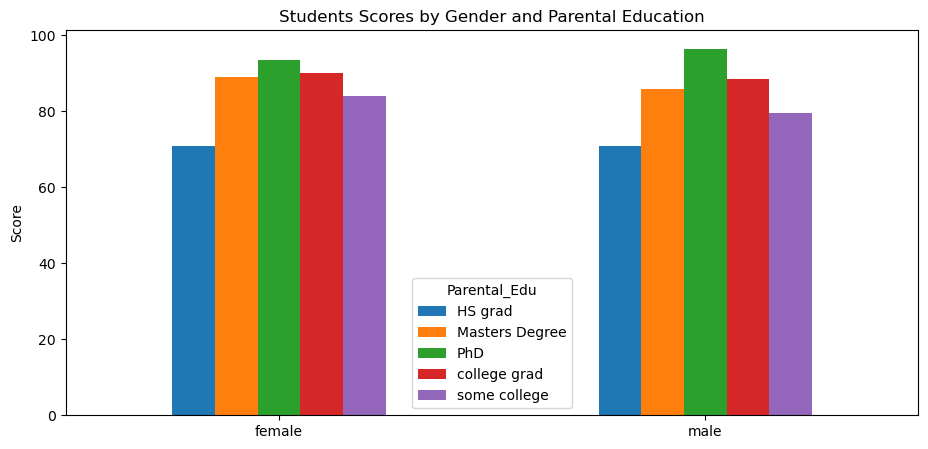

In [70]:
# make a bar chart of the avg scores by gender and parental edu
# result we want is 5 pairs (one per edu cat) of twin bars (male | female)
gender_vs_edu_avg_df.plot(kind="bar", figsize=(11,5))
plt.title("Students Scores by Gender and Parental Education")
plt.xlabel("")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.show()

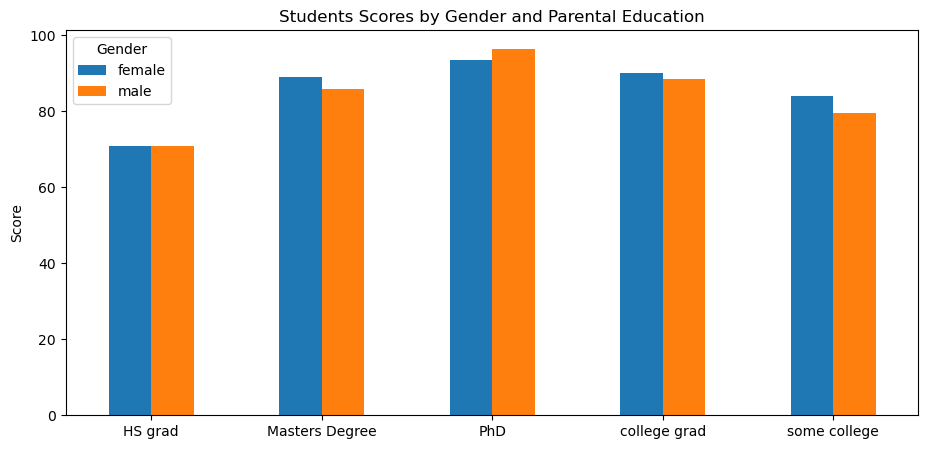

In [71]:
# make a bar chart of the avg scores by gender and parental edu
# result we want is 5 pairs (one per edu cat) of twin bars (male | female)
# df.T.plot(bar) T for Transpose -- this pivots the data
gender_vs_edu_avg_df.T.plot(kind="bar", figsize=(11,5))
plt.title("Students Scores by Gender and Parental Education")
plt.xlabel("")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.show()

In [72]:
# get the unique values from Salary column
pp.pprint(list(hr_df.columns))
print(hr_df['salary'].unique()) # ['low' 'medium' 'high']

NameError: name 'hr_df' is not defined

In [ ]:
# crosstab:
# pick TWO cols, each with categorical values:
# we will use 'left' (0,1) and
# 'salary (low,medium,high)
# new_cx_tab_df = df.crosstab(col1,col2)
# where unique values from col 1 will be the row names (index)
# and unique vals from col 2 will be the columns
# first col will be the index (unique values will be row names)
# left_

(2, 3)


salary,high,low,medium
left,,,
0,1155,5144,5129
1,82,2172,1317


In [ ]:
# rename the index (rows):
# left_

salary,high,low,medium
Stayed,1155,5144,5129
Left,82,2172,1317


In [ ]:
# rename the cols just to capitalize them:
# lef

,High,Low,Medium
Stayed,1155,5144,5129
Left,82,2172,1317


In [ ]:
# challenge: move High to be the last column
# HINT: pop high and insert at index 2
# high_

,Low,Medium
Stayed,5144,5129
Left,2172,1317


In [ ]:
# insert High at end
# left

,Low,Medium,High
Stayed,5144,5129,1155
Left,2172,1317,82


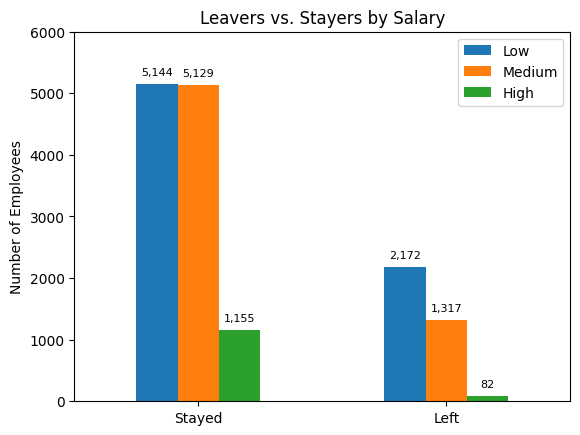

In [ ]:
# leavers vs stayers bar again BUT with each bar divided by salary category

# 'Leavers vs. Stayers by Salary'
# 'Number of Employees'


# label bars on a loop
# for

**One Hot Encoding** for **salary** and **departments**

In [ ]:
# convert salary to cat values using get_dummies
# sal_
print() # (14999, 3)
# sal_

(14999, 3)


,high,low,medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0


In [ ]:
# do one hot encoding for 'department' col which has 10 unique values
# hr_

In [ ]:
print() # (14999, 13)
# hr_

(14999, 13)


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,high,low,medium
0,0.38,0.53,2,157,3,0,1,0,sales,low,0,1,0
1,0.80,0.86,5,262,6,0,1,0,sales,medium,0,0,1
2,0.11,0.88,7,272,4,0,1,0,sales,medium,0,0,1
3,0.72,0.87,5,223,5,0,1,0,sales,low,0,1,0
4,0.37,0.52,2,159,3,0,1,0,sales,low,0,1,0


In [ ]:
# correlation matrix of all cols to look for best cols for training
# these being cols with high level of pos or neg correlation
# corr_

In [ ]:
print() # (14999, 13)
# corr

(11, 11)


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,high,low,medium
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605,0.029708,-0.047415,0.031367
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684,-0.020628,0.005221,0.006191
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064,-0.008726,-0.002504,0.007377
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544,-0.007101,-0.001050,0.005007
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433,0.039953,-0.040110,0.018299
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245,0.009040,-0.006813,0.001856
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788,-0.120929,0.134722,-0.068833
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000,0.076756,-0.082832,0.040985
high,0.029708,-0.020628,-0.008726,-0.007101,0.039953,0.009040,-0.120929,0.076756,1.000000,-0.292560,-0.260274
low,-0.047415,0.005221,-0.002504,-0.001050,-0.040110,-0.006813,0.134722,-0.082832,-0.292560,1.000000,-0.847144


In [ ]:
# prepare X and y for model training

# 'satisfaction_level','time_spend_company', 'Work_accident','promotion_last_5years'

In [ ]:
# print the training inputs
print() # (14999, 7)
# X

(14999, 7)


,low,medium,high,satisfaction_level,time_spend_company,Work_accident,promotion_last_5years
0,1,0,0,0.38,3,0,0
1,0,1,0,0.80,6,0,0
2,0,1,0,0.11,4,0,0
3,1,0,0,0.72,5,0,0
4,1,0,0,0.37,3,0,0


In [ ]:
# divide X into continuous vs binary so that continuous can be standard scalered
# X_
# 'Work_accident', 'promotion_last_5years'

In [ ]:
print() # (14999,5)
# X_

In [ ]:
# make another df of continous value cols, this for standard scaler
# 'satisfaction_level','time_spend_company'

In [ ]:
print() # (14999,2)
# X_

In [ ]:
# instantiate scaler
# sca

In [ ]:
# standard scaler the continuous df
# X_

In [ ]:
print() # (14999,2)
# X_

(14999, 2) <class 'numpy.ndarray'>


array([[-0.93649469, -0.34123516],
       [ 0.75281433,  1.71343614],
       [-2.02247906,  0.34365527],
       [ 0.43104118,  1.02854571],
       [-0.97671633, -0.34123516]])

In [ ]:
# make a df of X_continuous_scaled:
# 'satisfaction_level', 'time_spend_company'

In [ ]:
print() # (14999,2)
# X_

In [ ]:
# re-create X by concating 2 dfs: binary and continuous scaled
# X 

In [ ]:
print() # (14999,2)
# X

(14999, 7)


,low,medium,high,Work_accident,promotion_last_5years,satisfaction_level,time_spend_company
2913,0,1,0,0,0,0.913701,-0.341235
11016,0,1,0,0,0,0.028825,1.713436
2571,0,1,0,0,0,0.672371,-0.341235


In [ ]:
# there don't seem to be many 1's for Work_accident -- which is good
# but let's get the break down on that:
# "Work_accident"

In [ ]:
# "No Accident", "Had Accident"

In [ ]:
print() # (2, 1)
# work_

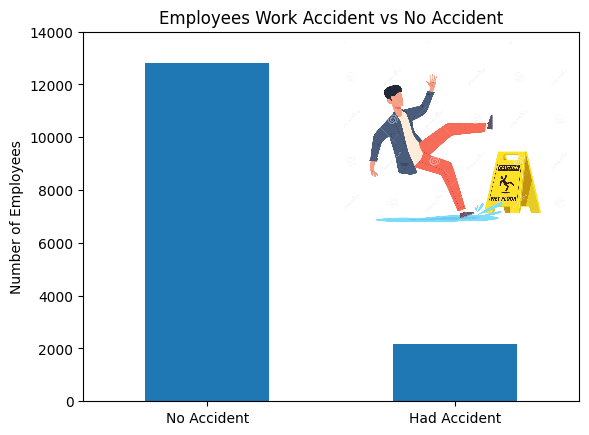

In [ ]:
# "Number of Employees"
# turn off label, which defaults to "Work_accident"
# "Employees Work Accident vs No Accident"

# load the slipping guy graphic
# 'guy-slipping-on-wet-floor.jpg'
# try to clip / crop bottom 50 px
# ima

In [ ]:
# make "little y" which is the vector of "answers" (labels)
# this is the values from the "left" column which is what we
# are training the model to predict

# (14999,)


In [ ]:
# divide the data into training and testing sets
# X_

In [ ]:
print() # (11999, 7) 80% of the total of 14,999
# X_

In [ ]:
print() # (3000, 7) 20% of the total of 14,999
# X_

In [ ]:
print() # (11999,) 80% of the total of 14,999
print() # (3000,) 80% of the total of 14,999

(11999,)
(3000,)


In [ ]:
# instantiate a LogisticRegression model
# logr

In [ ]:
# train the model
# logres

LogisticRegression()

In [ ]:
# feed the test data to the predict method and save all 3000 predictions
# y_pr

In [ ]:
# print the first 50 y_predictions
print()

[0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 1 0 0 1 1 0]


In [ ]:
# how well did the model do in predicting left (1) vs stayed (0)?
# get the score to find out!
# sco

In [ ]:
print() # 0.7563333333333333

0.7563333333333333


In [ ]:
# make confusion maxrix
# confusion_matrix(correct_answers,model_predicted_answers)
# daz
# da

In [ ]:
# 'Stayed','Left'
# 'Predicted Stayed','Actual Stayed'

**visualize confusion matrix as seaborn heatmap**
- this shows the 4 possible combos of and their counts:
- Actual 0, Predicted 0 (True Neg) -- 2138 count
- Actual 1, Predicted 0 (False Neg) -- 142 count
- Actual 0, Predicted 1 (False Pos) -- 525 count
- Actual 1, Predicted 1 (True Pos) -- 195 count

In [ ]:
# p
# sn
# sn
# , autopct='%1.1f%%'
# "Confusion Matrix for Left vs. Stayed Predictions"
# "Predicted"
# "Actual"
# pl